Loading data from: C:\Datasets\ICIP training data\ICIP training data\0\RawDataQA (1)
Found 52 files
Dataset size: 1
Dataset size: 42


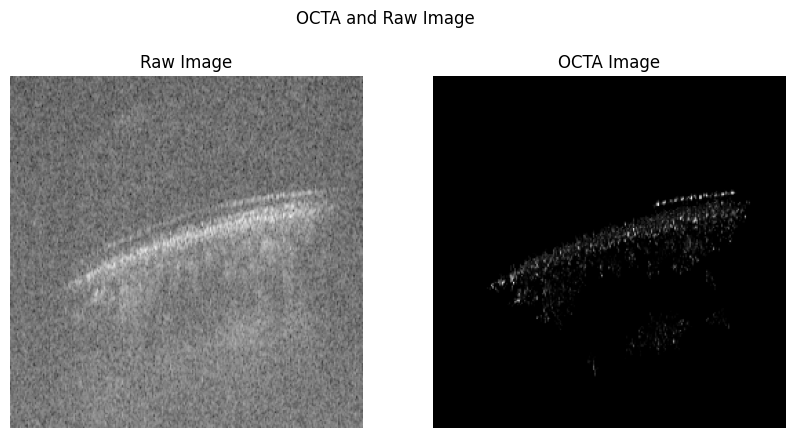

Train size: 29, Validation size: 6, Test size: 7


In [1]:
import torch

from ssn2v.models.enhanced_n2v_unet import get_e_n2n_unet_model

from ssn2v.stage1.run import run_stage1

model = get_e_n2n_unet_model()

config = {
    "train": False,
    "test": False,
    "evaluate": False,
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "model": model,
    "model_config": {
        "input_channels": 1,
        "output_channels": 1,
        "num_filters": 32,
        "num_layers": 4,
        "kernel_size": 3,
        "activation": "relu",
        "dropout_rate": 0.5,
    },
    "train_config": {
        "batch_size": 16,
        "learning_rate": 0.001,
        "num_epochs": 1,
        "loss_function": "mse",
        "optimizer": torch.optim.Adam(model.parameters(), lr=1e-3),
        "scheduler": "step_lr",
        "scheduler_step_size": 10,
        "criterion": torch.nn.MSELoss(),
        "early_stopping": True,
        "early_stopping_patience": 5,
        "early_stopping_delta": 0.01,
        "stage1_checkpoint_path": rf'checkpoints/stage1_stage1_model.pth',
        "stage2_checkpoint_path": rf'checkpoints/stage2_stage2_model.pth',
        "scratch": False,
        "visualise": True,
        "mask_ratio": 0.5,
    },
    "data_config": {
        "regular" : True, # type of preprocessing
        "img_size": (256), #square img
        "num_patients" : 2, # minimum of 2 
        "img_per_patient" : 50,
        "train_data_path": "./data/train",
        "val_data_path": "./data/val",
        "test_data_path": "./data/test"
    },
    
}
model, history, train_loader, val_loader, test_loader = run_stage1(config)


In [2]:
from ssn2v.stage2.run import run_stage2

config = {
    "train": False,
    "test": False,
    "evaluate": False,
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "model": model,
    "model_config": {
        "input_channels": 1,
        "output_channels": 1,
        "num_filters": 32,
        "num_layers": 4,
        "kernel_size": 3,
        "activation": "relu",
        "dropout_rate": 0.5,
    },
    "train_config": {
        "batch_size": 16,
        "learning_rate": 0.001,
        "num_epochs": 1,
        "loss_function": "mse",
        "optimizer": torch.optim.Adam(model.parameters(), lr=1e-3),
        "scheduler": "step_lr",
        "scheduler_step_size": 10,
        "criterion": torch.nn.MSELoss(),
        "early_stopping": True,
        "early_stopping_patience": 5,
        "early_stopping_delta": 0.01,
        "stage1_checkpoint_path": rf'ssn2v/checkpoints/stage1.pth',
        "stage2_checkpoint_path": rf'ssn2v/checkpoints/stage2.pth',
        "scratch": False,
        "visualise": True,
        "mask_ratio": 0.5,
        "debug": False,
    },
    "data_config": {
        "regular" : True, # type of preprocessing
        "img_size": (256), #square img
        "num_patients" : 2, # minimum of 2 
        "img_per_patient" : 50,
        "train_data_path": "./data/train",
        "val_data_path": "./data/val",
        "test_data_path": "./data/test"
    }
    
}

model, history, train_loader, val_loader, test_loader = run_stage2(config)

Loading data from: C:\Datasets\ICIP training data\ICIP training data\0\RawDataQA (1)
Found 52 files
Loading data from: C:\Datasets\ICIP training data\ICIP training data\0\RawDataQA (2)
Found 201 files
Loading data from: C:\Datasets\ICIP training data\ICIP training data\0\RawDataQA (3)
Found 187 files
Dataset v2 created with 3 images
Available patients: [1, 2, 3]
Train size: 91, Validation size: 17, Test size: 25


In [3]:
# print current dir
